### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head(1000)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,31,Married partner,...,never,1~3,never,never,1,1,0,0,1,1
996,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,31,Married partner,...,never,1~3,never,never,1,1,0,0,1,1
997,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,31,Married partner,...,never,1~3,never,never,1,1,0,0,1,1
998,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,31,Married partner,...,never,1~3,never,never,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

<Axes: >

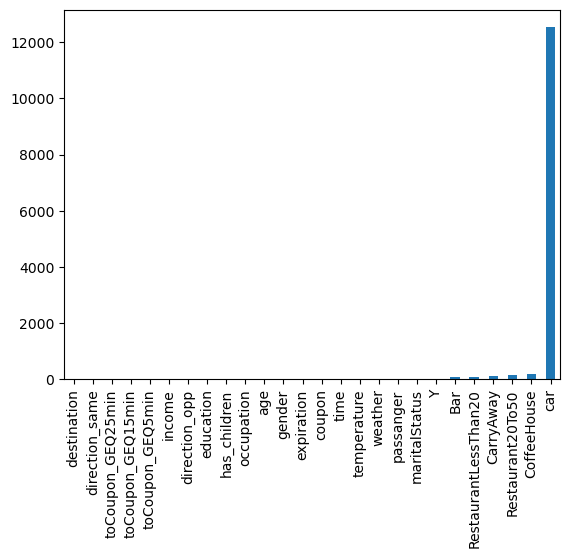

In [75]:
data.isnull().sum().sort_values().plot(kind = 'bar')


3. Decide what to do about your missing data -- drop, replace, other...

In [305]:
data = data.dropna(subset=["Bar","CoffeeHouse", "CarryAway"], how="all")

data.drop(['car'], axis=1)

data['Bar'].replace(['less1'],"never",regex=True, inplace=True)

data['CoffeeHouse'].replace(['less1'],"never",regex=True, inplace=True)

data['CarryAway'].replace(['less1'],"never",regex=True, inplace=True)

data['CarryAway'].fillna("never")

data.query("CarryAway == 'never'")


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
281,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,41,Divorced,...,gt8,never,1~3,never,1,0,0,0,1,1
282,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,41,Divorced,...,gt8,never,1~3,never,1,0,0,0,1,1
283,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,41,Divorced,...,gt8,never,1~3,never,1,1,0,0,1,0
284,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,41,Divorced,...,gt8,never,1~3,never,1,1,0,0,1,1
285,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,41,Divorced,...,gt8,never,1~3,never,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12635,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,26,Married partner,...,never,never,less1,less1,1,0,0,0,1,0
12636,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Female,26,Married partner,...,never,never,less1,less1,1,1,0,0,1,0
12637,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),1d,Female,26,Married partner,...,never,never,less1,less1,1,1,0,1,0,0
12638,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),2h,Female,26,Married partner,...,never,never,less1,less1,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12642 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12642 non-null  object
 1   passanger             12642 non-null  object
 2   weather               12642 non-null  object
 3   temperature           12642 non-null  int64 
 4   time                  12642 non-null  object
 5   coupon                12642 non-null  object
 6   expiration            12642 non-null  object
 7   gender                12642 non-null  object
 8   age                   12642 non-null  object
 9   maritalStatus         12642 non-null  object
 10  has_children          12642 non-null  int64 
 11  education             12642 non-null  object
 12  occupation            12642 non-null  object
 13  income                12642 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null  obj

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

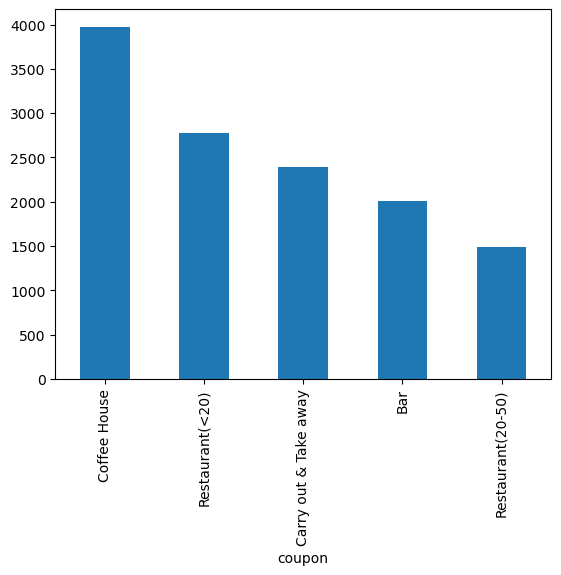

In [296]:
data["coupon"].value_counts().plot(kind="bar")


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

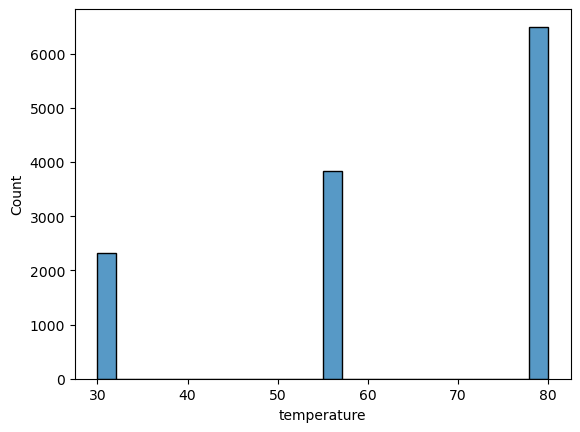

In [297]:
#data.hist(column = "temperature")

#px.histogram(data, x="temperature")

sns.histplot(data, x="temperature")



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [312]:
bar_df = data.query("coupon == 'Bar'")

bar_df.query("CoffeeHouse == 'never'")


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [473]:
value_counts = bar_df['Y'].value_counts()

count_for_y_value = value_counts[1]

index = len(bar_df.index)

total_count = len(bar_df.index)

accepted_bar_coupons = count_for_y_value / total_count

print("Proportion of the bar coupon accepted", accepted_bar_coupons)



Printing 0.40936254980079684


0.40936254980079684

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for drivers who go to a bar approximately 3 times a month: 0.6473551637279596
Acceptance rate for drivers who go to a bar more than 3 times a month: 0.7688442211055276
Compared acceptance rate: 0.8419848207964965


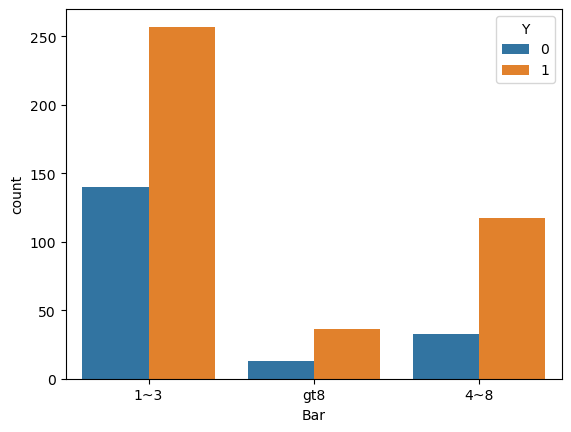

In [481]:
visit_bar_appx_3_time = bar_df[(bar_df["Bar"]=='1~3') & (bar_df["Y"] == 1)]

visit_bar_appx_more_than_3_time = bar_df[((bar_df["Bar"]=='4~8') | (bar_df["Bar"]=='gt8')) & (bar_df["Y"] == 1)]

acceptance_rate_went_3_fewer = len(visit_bar_appx_3_time)/len(bar_df[bar_df["Bar"].isin(['1~3'])])

acceptance_rate_went_more_3 = len(visit_bar_appx_more_than_3_time)/len(bar_df[bar_df["Bar"].isin(['4~8', 'gt8'])])

compared_acceptance_rate = acceptance_rate_went_3_fewer / acceptance_rate_went_more_3 

# print("Acceptance Rate:", compared_acceptance_rate)
print(f"Acceptance rate for drivers who go to a bar approximately 3 times a month: {acceptance_rate_went_3_fewer}")
print(f"Acceptance rate for drivers who go to a bar more than 3 times a month: {acceptance_rate_went_more_3}")
print(f"Compared acceptance rate: {compared_acceptance_rate}")

sns.countplot(data=bar_df[bar_df["Bar"].isin(['1~3', '4~8', 'gt8'])], x="Bar", hue="Y")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [498]:

visit_bar_more_1_time_age_less_25 = bar_df[(bar_df["age"] < '25') & (bar_df['Bar'] != 'never')]
acceptance_rate_1_time_age_less_25 = visit_bar_more_1_time_age_less_25['Y'].mean()


# more than once a month and are over the age of 25
visit_bar_more_1_time_age_more_25 = bar_df[(bar_df["age"] > '25') & (bar_df['Bar'] != 'never') & (bar_df["Y"] == 1)]
acceptance_visit_bar_more_1_time_age_more_25 = len(visit_bar_more_1_time_age_more_25) / len(bar_df[(bar_df["age"] > '25')])

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_visit_bar_more_1_time_age_more_25}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_1_time_age_less_25}")

difference = acceptance_rate_1_time_age_less_25 - acceptance_visit_bar_more_1_time_age_more_25
print(f"Difference : {difference} ")

print(f"Conclusion - Younger People,who goes to Bar are accepting more coupon IE. 60% of the coupouns are accepted by them and", 
                      "19% are accepted by age group > 25")




Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.1878140703517588
Acceptance rate for all other drivers: 0.6867469879518072
Difference : 0.49893291760004843 
Conclusion - Younger People,who goes to Bar are accepting more coupon IE. 60% of the coupouns are accepted by them and 19% are accepted by age group > 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [464]:

# who are the people who accepted bar coupoun and are not farming, fishing, forestry
filtered_passengers = bar_df[~bar_df['occupation'].isin(['Farming Fishing & Forestry'])]

# who are the people who want to bar more then once and have not kids
driver_goes_more_then_once_nokids = filtered_passengers.query("passanger !='Kid(s)'")

merged_df = pd.merge(bar_df,driver_goes_more_then_once_nokids, how='inner')

acceptance_rate_bar_frequent = merged_df['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month: {acceptance_rate_bar_frequent}")



Acceptance rate for drivers who go to bars more than once a month: 0.43401435670900057


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [470]:
# Condition 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = (
    (bar_df['passanger'] != 'Kid(s)') &  # passengers that were not a kid
    (bar_df['maritalStatus'] != 'Widowed')  # not widowed
)

# Condition 2: Drivers who go to bars more than once a month and are under the age of 30
condition_2 = (
    (bar_df['age'] < '30')  # under the age of 30
)

# Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (
    (bar_df['RestaurantLessThan20'] == '4~8') &  # go to cheap restaurants more than 4 times a month
    (bar_df['income'] == '$12500 - $24999')  # income is less than 50K (adjust as needed)
)

# Combine the conditions using logical OR (|)
combined_condition = condition_1 | condition_2 | condition_3

# Filter the DataFrame based on the combined condition
filtered_df = bar_df[combined_condition]

# Calculate acceptance rate for the specified condition
acceptance_rate_combined = filtered_df['Y'].mean()

# Print or use the result as needed
print(f"Acceptance rate for drivers who satisfy any of the specified conditions: {acceptance_rate_combined}")


Acceptance rate for drivers who satisfy any of the specified conditions: 0.43232876712328766


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Conclusion 

1. Younger People,who goes to Bar are accepting more coupon ie. 60% of the coupouns are accepted by them and 19% are accepted by age group > 25.


2. 43.23% of the drivers who meet these specified conditions have an accepted outcome
   - passanger is/are not kids and marital status is not widow
   - Age is less then 30
   - Goes to the cheaper Restaurant with income less than 24k
   

3. Acceptance rate for drivers who go to bars more than once a month is 43%


4. Acceptance rate for drivers who go to a bar approximately 3 times a month: 64%


5. Acceptance rate for drivers who go to a bar more than 3 times a month: 76%


6. Overall 41% of the coupons are accepted.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  